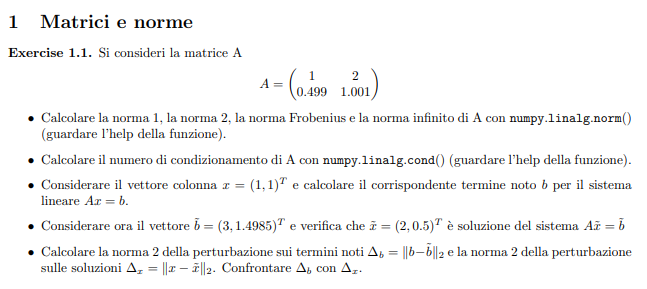

In [2]:
import numpy as np

help(np.linalg) # View source
help (np.linalg.norm)
help (np.linalg.cond)

Help on package numpy.linalg in numpy:

NAME
    numpy.linalg

DESCRIPTION
    ``numpy.linalg``
    
    The NumPy linear algebra functions rely on BLAS and LAPACK to provide efficient
    low level implementations of standard linear algebra algorithms. Those
    libraries may be provided by NumPy itself using C versions of a subset of their
    reference implementations but, when possible, highly optimized libraries that
    take advantage of specialized processor functionality are preferred. Examples
    of such libraries are OpenBLAS, MKL (TM), and ATLAS. Because those libraries
    are multithreaded and processor dependent, environmental variables and external
    packages such as threadpoolctl may be needed to control the number of threads
    or specify the processor architecture.
    
    - OpenBLAS: https://www.openblas.net/
    - threadpoolctl: https://github.com/joblib/threadpoolctl
    
    Please note that the most-used linear algebra functions in NumPy are present in
    t

In [3]:
n = 2
A = np.array([[1, 2], [0.499, 1.001]])

print ('Norme di A:')
norm1 = np.linalg.norm(A, 1)
norm2 = np.linalg.norm(A, 2)
normfro = np.linalg.norm(A, 'fro')
norminf = np.linalg.norm(A, np.inf)

print('Norma1 = ', norm1, '\n')
print('Norma2 = ', norm2, '\n')
print('Normafro = ', normfro, '\n')
print('Norma infinito = ', norminf, '\n')

cond1 = np.linalg.cond(A, 1)
cond2 = np.linalg.cond(A, 2)
condfro = np.linalg.cond(A, 'fro')
condinf = np.linalg.cond(A, np.inf)

print ('K(A)_1 = ', cond1, '\n')
print ('K(A)_2 = ', cond2, '\n')
print ('K(A)_fro =', condfro, '\n')
print ('K(A)_inf =', condinf, '\n')

x = np.ones((2,1))
b = np.dot(A,x)

btilde = np.array([[3], [1.4985]])
xtilde = np.array([[2, 0.5]]).T

# Verificare che xtilde è soluzione di A xtilde = btilde
# A * xtilde = btilde
print ('A*xtilde = ', A@xtilde, btilde)

deltax = np.linalg.norm(x-xtilde, 2)
deltab = np.linalg.norm(b-btilde, 2)

print ('delta x = ', deltax)
print ('delta b = ', deltab)

Norme di A:
Norma1 =  3.001 

Norma2 =  2.500200104037774 

Normafro =  2.5002003919686118 

Norma infinito =  3.0 

K(A)_1 =  3001.0000000001082 

K(A)_2 =  2083.666853410337 

K(A)_fro = 2083.6673333334084 

K(A)_inf = 3001.0000000001082 

A*xtilde =  [[3.    ]
 [1.4985]] [[3.    ]
 [1.4985]]
delta x =  1.118033988749895
delta b =  0.0015000000000000568


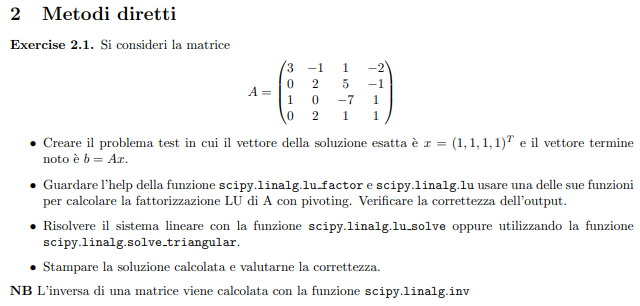

In [4]:
import numpy as np
import scipy
# help (scipy)
import scipy.linalg
# help (scipy.linalg)
import scipy.linalg.decomp_lu as LUdec
# help (LUdec)
# help(scipy.linalg.lu_solve )

# crazione dati e problema test
A = np.array ([ [3,-1, 1,-2], [0, 2, 5, -1], [1, 0, -7, 1], [0, 2, 1, 1]  ])
x = np.array([[1, 1, 1, 1]]).T
b = A@x

condA = np.linalg.cond(A)

print('x: \n', x , '\n')
print('x.shape: ', x.shape, '\n' )
print('b: \n', b , '\n')
print('b.shape: ', b.shape, '\n' )
print('A: \n', A, '\n')
print('A.shape: ', A.shape, '\n' )
print('K(A)=', condA, '\n')

x: 
 [[1]
 [1]
 [1]
 [1]] 

x.shape:  (4, 1) 

b: 
 [[ 1]
 [ 6]
 [-5]
 [ 4]] 

b.shape:  (4, 1) 

A: 
 [[ 3 -1  1 -2]
 [ 0  2  5 -1]
 [ 1  0 -7  1]
 [ 0  2  1  1]] 

A.shape:  (4, 4) 

K(A)= 14.208370392921381 



In [5]:
#help(LUdec.lu_factor)
LR, Pivot = scipy.linalg.lu_factor(A)

print('LR',LR,'\n')
print('Pivot',Pivot,'\n')

LR [[ 3.         -1.          1.         -2.        ]
 [ 0.          2.          5.         -1.        ]
 [ 0.33333333  0.16666667 -8.16666667  1.83333333]
 [ 0.          1.          0.48979592  1.10204082]] 

Pivot [0 1 2 3] 



In [6]:
my_x = scipy.linalg.lu_solve((LR,Pivot), b)

print('my_x = \n', my_x)
print('norm =', scipy.linalg.norm(x-my_x, 'fro'))

my_x = 
 [[1.]
 [1.]
 [1.]
 [1.]]
norm = 7.021666937153402e-16


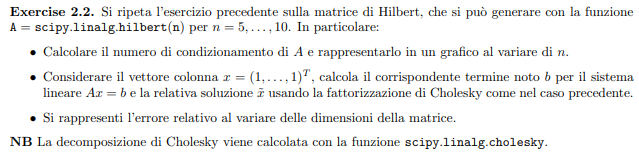

K(A):  [[4.76607250e+05]
 [1.49510586e+07]
 [4.75367357e+08]
 [1.52575755e+10]
 [4.93153756e+11]
 [1.60244170e+13]]
Er:  [[2.14310056e-12]
 [2.70963155e-10]
 [1.18467883e-08]
 [4.02376491e-08]
 [5.52326763e-06]
 [2.10426911e-05]]


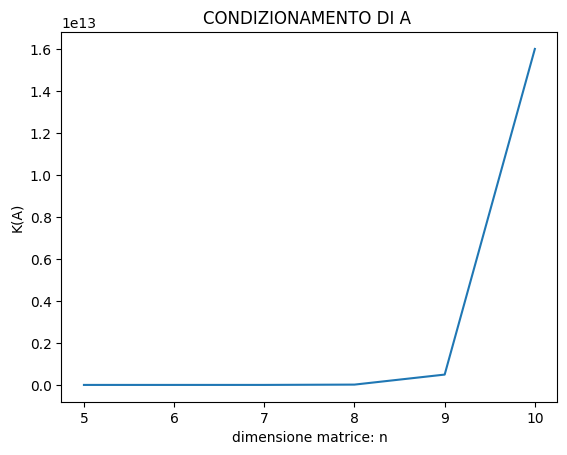

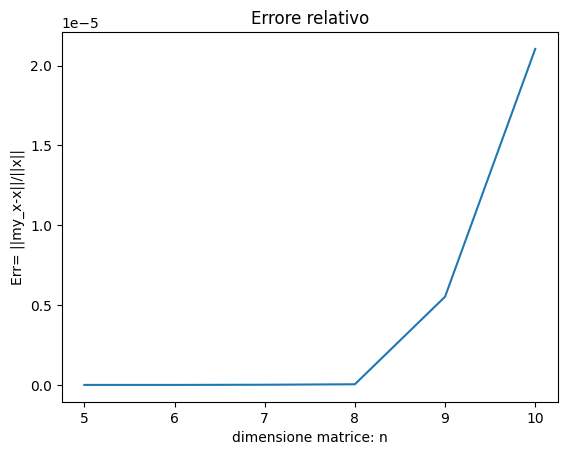

In [9]:
import scipy.linalg.decomp_lu as LUdec
import matplotlib.pyplot as plt

K_A = np.zeros((6,1))
Err = np.zeros((6,1))

for n in np.arange(5,11):
    # crazione dati e problema test
    A = scipy.linalg.hilbert(n)
    x = np.ones((n,1))
    b = A@x

    # numero di condizione
    K_A[n-5] = np.linalg.cond(A)

    # fattorizzazione
    L = scipy.linalg.cholesky(A)
    y = scipy.linalg.solve(L.T, b)
    my_x = scipy.linalg.solve(L, y)

    # errore relativo
    Err[n-5] = scipy.linalg.norm(x-my_x)/scipy.linalg.norm(x)

print("K(A): ", K_A)
print("Er: ", Err)

x = np.arange(5,11)

# grafico del numero di condizione vs dim
plt.plot(np.arange(5,11), K_A)
plt.title('CONDIZIONAMENTO DI A ')
plt.xlabel('dimensione matrice: n')
plt.ylabel('K(A)')
plt.show()


# grafico errore in norma 2 in funzione della dimensione del sistema
plt.plot(np.arange(5,11), Err)
plt.title('Errore relativo')
plt.xlabel('dimensione matrice: n')
plt.ylabel('Err= ||my_x-x||/||x||')
plt.show()

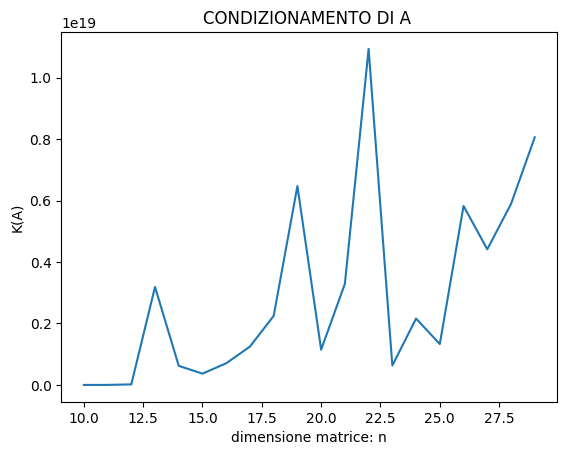

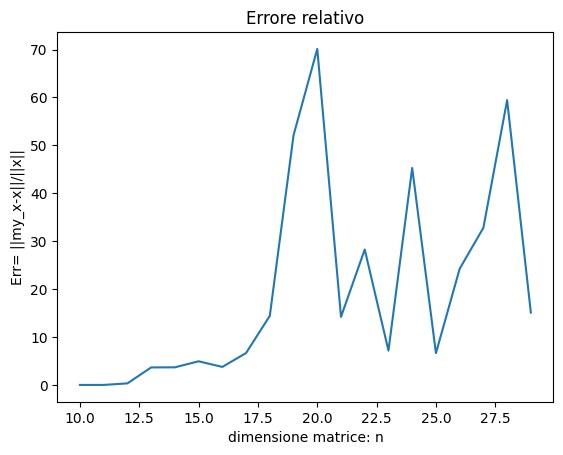

In [8]:
import scipy.linalg.decomp_lu as LUdec
import matplotlib.pyplot as plt

K_A = np.zeros((20,1))
Err = np.zeros((20,1))

for n in np.arange(10,30):
    # crazione dati e problema test
    A = scipy.linalg.hilbert(n)
    x = np.ones((n,1))
    b = A@x

    # numero di condizione
    K_A[n-10] = np.linalg.cond(A)

    # fattorizzazione
    lu ,piv = scipy.linalg.lu_factor(A)
    my_x = scipy.linalg.lu_solve((lu,piv), b)

    # errore relativo
    Err[n-10] = scipy.linalg.norm(x-my_x)/scipy.linalg.norm(x)

x = np.arange(10,30)

# grafico del numero di condizione vs dim
plt.plot(np.arange(10,30), K_A)
plt.title('CONDIZIONAMENTO DI A ')
plt.xlabel('dimensione matrice: n')
plt.ylabel('K(A)')
plt.show()


# grafico errore in norma 2 in funzione della dimensione del sistema
plt.plot(np.arange(10,30), Err)
plt.title('Errore relativo')
plt.xlabel('dimensione matrice: n')
plt.ylabel('Err= ||my_x-x||/||x||')
plt.show()